# ANLY 590 HW 1

### April Chung
### 10/13/2018

## 1 Feedforward: Building a ReLu 2 Layer Neural Network

### Plot of Neural Network with 2 hidden layers and 3 outputs

<img src = 'NNplot.JPG'>

### Mathematical equations

Given that the index $i$ represents the number of the first hidden layer, we have for i = 1,2,3

$$a_i = w_{1i}x_1 + w_{2i}x_2 + c_i$$

Then the $a_i$ outputs are put into an activation function- the relu function $f(x)$ 

$$h_i = f(a_i)$$

The second layer uses the output from the first layer with the following equations for j = 1,2

$$b_j = v_{1j}h_1 + v_{2j}h_2 + v{3j}h_3 + k_j$$

Then the $b_j$ outputs are put into an activation function- the relu function $f(x)$ 

$$p_j = f(b_j)$$

The last layer uses the output from the second layer with the following equations for l = 1,2,3

$$c_l = z_{1l}p_1 + z_{2l}p_2 + s_l$$

Then the $c_l$ outputs are put into a softmax function $g(x)$ that gives three outputs

$$y_l = g(c_l)$$


 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
def reLu(x):
    v = np.maximum(x,0)
    return v

def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]

In [3]:
def ff_nn_2_ReLu(x, w, v, b, c, k, s):
    '''
    A NN with 2 inputs, 2 hidden layers with 3 and 2 nodes, and 3 outputs
    Using relu activation functions except for the output uses softmax function
    
    '''
    a1 = np.dot(w,x) + c
    h1 = reLu(a1)
    a2 = np.dot(h1, np.transpose(v)) + k
    h2 = reLu(a2)
    a3 = np.dot(h2,np.transpose(b)) + s
    y = softmax(a3)
    
    return np.array(y)

In [358]:
#inputs weights 
w = np.array([(1,0),(-1,0), (0, 0.5)])
v = np.array([(1,0,0), (-1, -1, 0)])
b = np.array([(1,1), (0,0), (-1, -1)])
x = np.array([(1,0,0), (-1, -1, 1)])
c = np.array([[0,0,1]])
k = np.array([[1,-1]])
s = np.array([[1,0,0]])

### The class probabilities for the three outputs:

In [5]:
ff_nn_2_ReLu(x,w,v,b,c,k,s)

array([[0.94649912, 0.04712342, 0.00637746],
       [0.84379473, 0.1141952 , 0.04201007],
       [0.84379473, 0.1141952 , 0.04201007]])

### Conclusion
The matrix shows three rows of the outputs with the first output with the highest probability.

## 2 Gradient Descent
### Rosenbrock Function

### The partial derivatives
$$f(x,y) = (1-x)^2 + 100*(y-x^2)^2$$

For partial derivative with respect to x

$$\frac{d}{dx} = 400x^3 - 400xy - 2(1-x)$$

For partial derviative with respect to y

$$\frac{d}{dy} = 200y - 200x^2$$

In [423]:
delta = .25
c = 4
x = np.arange(-c, c, delta)
y = np.arange(-c, c, delta)
X, Y = np.meshgrid(x, y)
f = (1-X)**2 +  100*(Y-X**2)**2

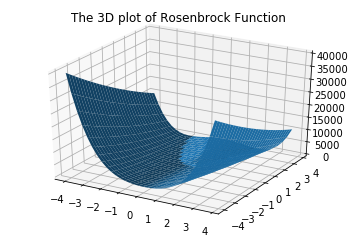

In [426]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, f)
ax.set_title("The 3D plot of Rosenbrock Function")

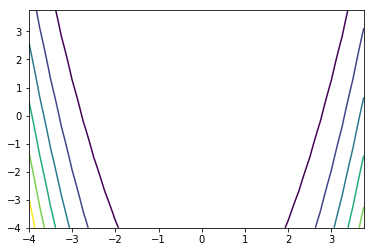

In [11]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, f)

In [427]:
def grad_rosenbrock(vector):
    x, y = vector
    df_dx = 400*x**3 - 400*x*y + 2*x - 2
    df_dy = 200*y - 200*x**2
    return np.array([df_dx, df_dy])

In [428]:
def loss(coeffs):
    # minimize the f(x,y) values
    w1, w2 = coeffs
    return (1 - w1)**2 + 100*(w2 - w1**2)**2

In [430]:
def grad_descent(starting_point=None, iterations=100, learning_rate=.5):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-4,4,size=2)
    trajectory = [point]
    losses = []
    
    for i in range(iterations):
        grad = grad_rosenbrock(point)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(np.average(loss(point)))
    return (np.array(trajectory), losses)

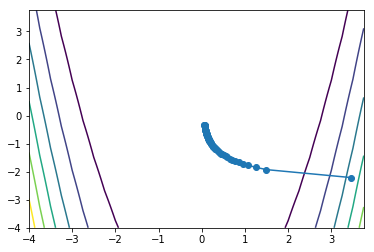

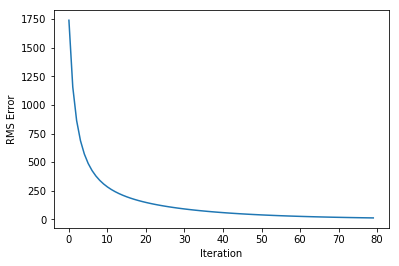

In [431]:
traj, losses = grad_descent(iterations=80,learning_rate=0.0001)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, f)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
fig, ax = plt.subplots()
plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

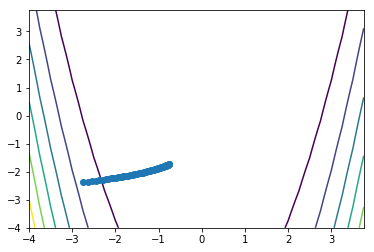

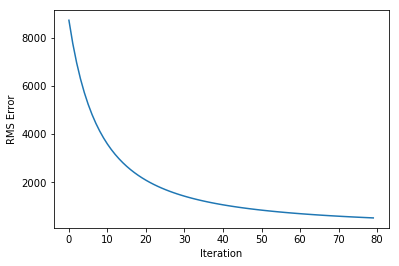

In [432]:
traj, losses = grad_descent(iterations=80,learning_rate=0.00001)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, f)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
fig, ax = plt.subplots()
plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

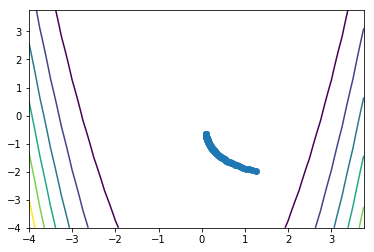

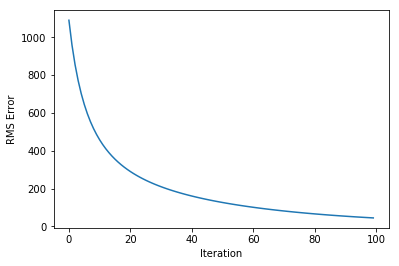

In [433]:
traj, losses = grad_descent(iterations=100,learning_rate=0.00005)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, f)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
fig, ax = plt.subplots()
plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

### Conclusion
The gradient descent worked best for Rosenbrock function with learning rate of 0.0001. As I decreased the learning rate, the gradient couldn't find the minimum, and increasing the learning rate would overstep the minimum. So at a fine mark of 0.0001, the gradient descent converged.

### Gradient Descent with Momentum

In [18]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-4,4,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    losses = []
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
        losses.append(np.average(loss(point)))
    return (np.array(trajectory), losses)

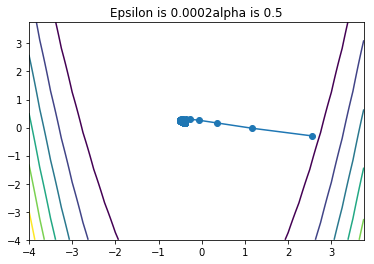

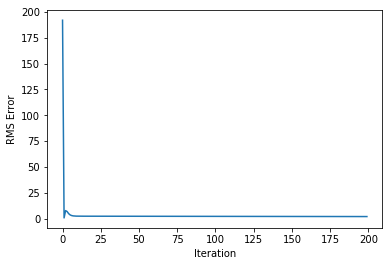

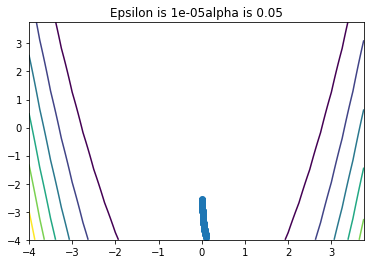

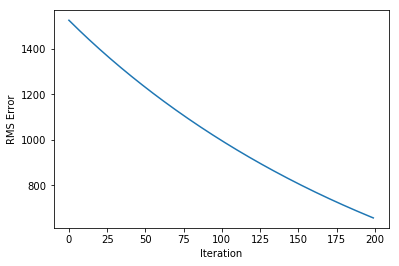

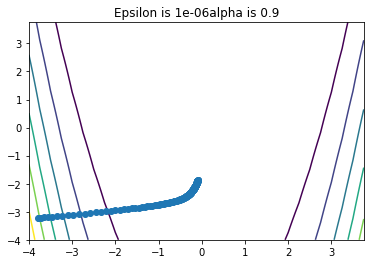

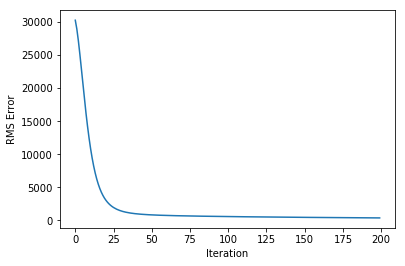

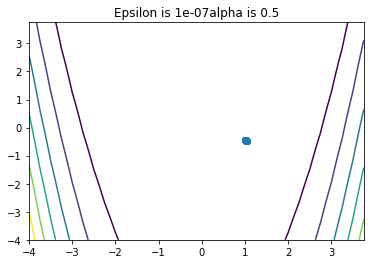

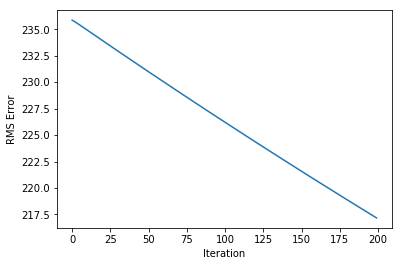

In [19]:
thetas = [(2e-4, .5), (1e-5, .05), (1e-6, .9), (1e-7, .5)]
for e,a in thetas:
    traj, losses = grad_descent_with_momentum(iterations=200, epsilon= e, alpha= a)

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, f)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')
    plt.title("Epsilon is " + str(e) + "alpha is " + str(a))
    fig, ax = plt.subplots()
    plt.plot(losses)
    plt.ylabel("RMS Error")
    plt.xlabel("Iteration")

### Conclusion
The gradient descent with momentum seemed to converge more smoothly as long as the learning rate wasn't too large or too small. So between 1e-4 to 1e-6 where alpha values where greater or equal to 0.5, the algorithm reached close to minimum.

## Part 3 Backprop

Using the network from part 1, the categorical cross entropy is:

$$L = -\Sigma_{i}y_ilog(\hat{y_i})$$

Using the same notations from part 1 for weights, biases and outputs from the hidden layers, we have the following equations of partial derivatives. 

The gradient of the Loss function:

$$\frac{dL}{d\hat{y_i}} = \vec{\hat{y}} - \vec{y}$$

The gradient of the Loss function with respect to the weight matrix $b$:

$$\frac{dL}{db} = \frac{dL}{d\vec{\hat{y_i}}} * \frac{d\vec{\hat{y}}}{db}$$

Let $b$ and $\vec{p}$ represent a matrix of weights and vector output, respectively, and $\vec{s}$ is a vector of the bias
$$\frac{d\hat{y_i}}{db} = \frac{d}{db}b\vec{p} + \vec{s}$$

$$\frac{d\hat{y_i}}{db} = \vec{p}$$

So, we have the gradient of the loss function with respect to $b$:

$$\frac{dL}{d\hat{b}} = (\vec{\hat{y}} - \vec{y})\vec{p}$$

Moreover, the gradient of the loss function with respect to bias vector, $s$, is:
$$\frac{dL}{d\vec{s}} = \frac{dL}{d\vec{\hat{y}}} * \frac{d\vec{\hat{y}}}{d\vec{s}}$$
$$\frac{d\hat{y_i}}{d\vec{s}} = \frac{d}{db}[b\vec{p} + \vec{s} ]= \vec{1}$$

$$\frac{dL}{d\vec{s}} = (\vec{\hat{y}} - \vec{y})$$


The gradient of the loss function for the rest of the parameters are done by back propogating through the previously derived weights.

So, the gradient with respect to weight matrix, V

$$\frac{dL}{dV} = \frac{dL}{d\vec{\hat{y}}} * \frac{d\vec{\hat{y}}}{d\vec{p}} * \frac{d\vec{p}}{d\vec{h}} * \frac{d\vec{h}}{dV} $$

We find that

$$\frac{d\vec{\hat{y}}}{d\vec{p}} = \frac{d}{d\vec{p}}[b\vec{p} + \vec{s}] = b$$

\begin{equation}
  \frac{d\vec{p}}{d\vec{h}} = \frac{d}{d\vec{h}}(max(0,p) = \begin{cases}
    1, & \text{if $p_j>0$ for j = 1,2}.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}


$$\frac{d\vec{h}}{dV} = \frac{d}{dV}[V\vec{h} + \vec{c}] = \vec{h}$$

Multiplying all the partial derivatives, we have

\begin{equation}
  \frac{dL}{dV} = \vec{h}(\vec{\hat{y}} - \vec{y})b \begin{cases}
    1, & \text{if $p_j>0$ for j = 1,2}.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}

The gradient with respect to bias vector $\vec{k}$ is
$$\frac{dL}{d\vec{k}} = \frac{dL}{d\vec{\hat{y}}} * \frac{d\vec{\hat{y}}}{d\vec{p}} * \frac{d\vec{p}}{d\vec{h}} * \frac{d\vec{h}}{d\vec{k}}$$

\begin{equation}
  \frac{dL}{d\vec{k}} = (\vec{\hat{y}} - \vec{y})b \begin{cases}
    1, & \text{if $p_j>0$ for j = 1,2}.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}

Finally, the gradient with respect to weight matrix W is

$$\frac{dL}{dW} = \frac{dL}{d\vec{\hat{y}}} * \frac{d\vec{\hat{y}}}{d\vec{p}} * \frac{d\vec{p}}{d\vec{h}} * \frac{d\vec{h}}{dx} * \frac{dx}{dW} $$

\begin{equation}
  \frac{d\vec{h}}{dx} = \frac{d}{dx}max(0,x) =  \begin{cases}
    1, & \text{if $x>0$}.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}

$$\frac{dx}{dW} = \frac{d}{dW}[xW + \vec{c}] = x$$

So, we have
\begin{equation}
  \frac{dL}{dW} = x(\vec{\hat{y}} - \vec{y})b  \begin{cases}
    1, & \text{if $p>0$}.\\
    0, & \text{otherwise}.
  \end{cases}
  V \begin{cases}
    1, & \text{if $x>0$}.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}

Lastly, the gradient with respect to bias vector, $\vec{c}$ is
\begin{equation}
  \frac{dL}{d\vec{c}} = (\vec{\hat{y}} - \vec{y})b  \begin{cases}
    1, & \text{if $p>0$}.\\
    0, & \text{otherwise}.
  \end{cases}
  V \begin{cases}
    1, & \text{if $x>0$}.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}

In [126]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import pandas as pd

In [359]:
def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return  -tot.sum()

def relu(x):
    return np.maximum(x,0)

def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]


def yhat(x, W, c, V, k, b, s):
    # returns model prediction 
    a1 = x.dot(W.T) + c
    H = relu(a1)
    a2 = H.dot(V.T) + k
    P = relu(a2)
    a3 = P.dot(b.T) + s
    y_hat = softmax(a3)

    return y_hat


def pack_params(param_vec):
    w_11, w_12, w_21, w_22, w_31, w_32, c1, c2, c3, v_11, v_12, v_13, v_21, v_22, v_23, k1, k2, b_11, b_12, b_21, b_22, b_31, b_32, s1, s2, s3 = param_vec
    W = np.array([[w_11,w_12],[w_21, w_22],[w_31,w_32]])
    c = np.array([c1, c2, c3])
    V = np.array([[v_11, v_12, v_13], [v_21, v_22, v_23]])
    k = np.array([k1, k2])
    b = np.array([[b_11, b_12],[b_21, b_22], [b_31, b_32]])
    s = np.array([s1, s2, s3])
    
    return((W, c, V, k, b, s))
    
def unpack_params(W, c, V, k, b, s):
    w_11, w_12, w_21, w_22, w_31, w_32 = W[0,0], W[0,1], W[1,0], W[1,1], W[2,0], W[2,1]
    c1, c2, c3 = c[0], c[1], c[2]
    v_11, v_12, v_13, v_21, v_22, v_23 = V[0,0], V[0,1], V[0,2], V[1,0], V[1,1], V[1,2]
    k1, k2 = k[0], k[1]
    b_11, b_12, b_21, b_22, b_31, b_32 = b[0,0], b[0,1], b[1,0], b[1,1], b[2,0], b[2,1]
    s1, s2, s3 = s[0], s[1], s[2]
    return np.array([ w_11, w_12, w_21, w_22, w_31, w_32, c1, c2, c3,v_11, v_12, v_13, v_21, v_22, v_23, k1, k2, b_11, b_12, b_21, b_22, b_31, b_32, s1, s2, s3])

In [360]:
def grad_f(param_vec, x, y):
    
    W, c, V, k, b, s = pack_params(param_vec)
    
    a1 = x.dot(W.T) + c
    H = relu(a1)
    a2 = H.dot(V.T) + k
    P = relu(a2)
    a3 = P.dot(b.T) + s
    y_hat = softmax(a3)
    
    d_b = P.T.dot(y_hat - y)
    d_s = (y_hat - y).sum(axis=0)
    d_V = H.T.dot((y_hat - y).dot(b)*(P > 0))
    d_k = ((y_hat - y).dot(b)*(P > 0)).sum(axis=0)

    d_W = x.T.dot(((y_hat - y).dot(b) * (P > 0)).dot(V)*(H > 0))
    d_c = (((y_hat - y).dot(b) * (P > 0)).dot(V)*(H > 0)).sum(axis=0)
    
    param_vec = unpack_params(d_W.T, d_c, d_V.T, d_k, d_b.T, d_s)
    return np.array(param_vec)
    

In [374]:
def grad_descent_3(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=26).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

In [375]:
def gen_gmm_data(n = 999, plot=False):
    # Fixing seed for repeatability
    np.random.seed(123)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    
    # Setting up the class probabilities
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1,pr_class_2, pr_class_3])).astype(int)
  
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n_class[i]*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n_class[i]*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)
            
        # One hot encoding classes
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).as_matrix() 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    return xs, y, cl

In [376]:
x,y,cl = gen_gmm_data(500)

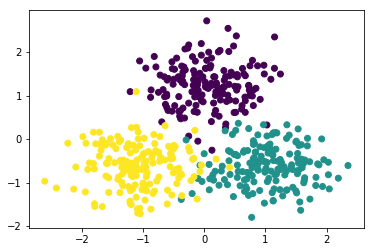

In [377]:
plt.scatter(x[:,0], x[:,1], c=cl)

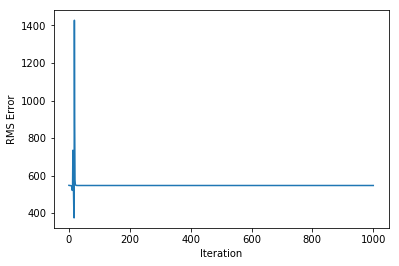

In [378]:
traj, losses = grad_descent_3(x, y, iterations=1000,learning_rate=0.01)
plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

In [379]:
pred_probs = yhat(x,*pack_params(traj[-1]))
sum((np.argmax(pred_probs, axis=1) == cl)[0,:]) / cl.shape[1]

0.3333333333333333

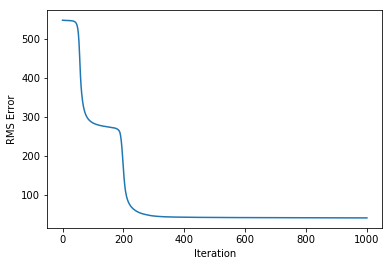

In [380]:
traj, losses = grad_descent_3(x, y, iterations=1000,learning_rate=1e-3)
plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

In [381]:
pred_probs = yhat(x,*pack_params(traj[-1]))
sum((np.argmax(pred_probs, axis=1) == cl)[0,:]) / cl.shape[1]

0.9698795180722891

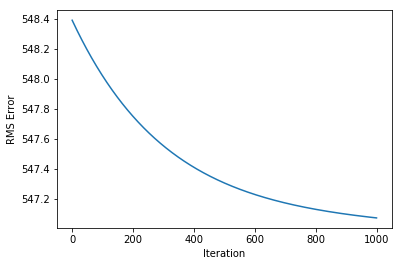

In [382]:
traj, losses = grad_descent_3(x, y, iterations=1000,learning_rate=1e-5)
plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

In [383]:
pred_probs = yhat(x,*pack_params(traj[-1]))
sum((np.argmax(pred_probs, axis=1) == cl)[0,:]) / cl.shape[1]

0.3333333333333333

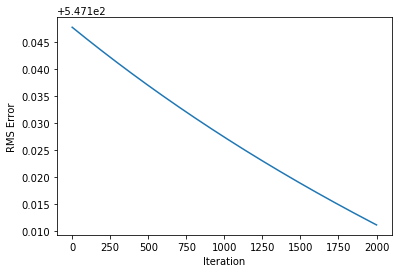

In [384]:
traj, losses = grad_descent_3(x, y, iterations=2000,learning_rate=1e-6)
plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

In [385]:
pred_probs = yhat(x,*pack_params(traj[-1]))
sum((np.argmax(pred_probs, axis=1) == cl)[0,:]) / cl.shape[1]

0.3333333333333333

### Gradient Descent With Momentum

In [410]:
def grad_descent_with_momentum_3(x, y, starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-.1,.1,size=26).astype("float128")
    trajectory = [point]
    v = np.zeros(point.size)
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

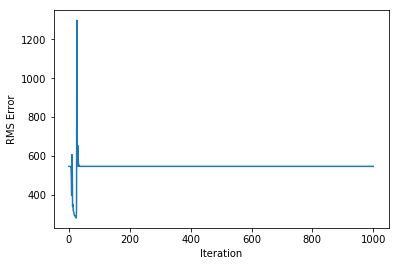

In [411]:
traj, losses = grad_descent_with_momentum_3(x, y, iterations=1000, alpha=.5, epsilon=1e-2)
plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

In [412]:
pred_probs = yhat(x,*pack_params(traj[-1]))
sum((np.argmax(pred_probs, axis=1) == cl)[0,:]) / cl.shape[1]

0.3333333333333333

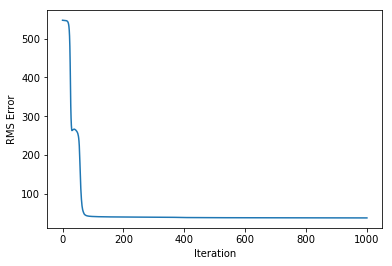

In [419]:
traj, losses = grad_descent_with_momentum_3(x, y, iterations=1000, alpha=.8, epsilon=1e-3)
plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

In [420]:
pred_probs = yhat(x,*pack_params(traj[-1]))
sum((np.argmax(pred_probs, axis=1) == cl)[0,:]) / cl.shape[1]

0.9698795180722891

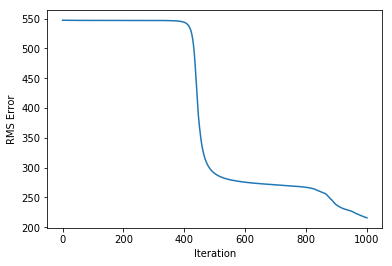

In [421]:
traj, losses = grad_descent_with_momentum_3(x, y, iterations=1000, alpha=.8, epsilon=1e-4)
plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

In [422]:
pred_probs = yhat(x,*pack_params(traj[-1]))
sum((np.argmax(pred_probs, axis=1) == cl)[0,:]) / cl.shape[1]

0.8132530120481928

### Conclusion
The gradient descent with momentum converged more efficently at about less than 200 iterations whereas the gradient descent without the momentum took more iterations at about a little over 200 before it converged. 